<a href="https://colab.research.google.com/github/twisha-k/Python_notes/blob/main/129_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 129: ARIMA III - Autoregression Model

---

#### Teacher-Student Activities

In the previous class, we implemented an ARIMA model using the `statsmodels` module and predicted future sales. ARIMA is a subset of **autoregressive models** that uses observations from previous time steps as input to a linear regression equation to predict the future values.

The autoregressive model includes AR (auto-regressive) terms or MA (moving average)
terms. Based on the components used, multiple approaches can be used in
time series forecasting such as:
- Pure Autoregressive  (AR)
- Moving Average (MA)
- Autoregressive Moving Average (ARMA)
- Autoregressive Integrated Moving Average (ARIMA)


In today's class, we are going to talk about AR models and implement a pure AR model to forecast time series problems.

Let us first recall the concepts covered in the previous lesson and start this lesson from **Activity 1: Data Preparation**.

---

#### Recap

####  Dummy Data Preparation



In [ ]:
# Generate random time series data

# Import the Python modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

np.random.seed(2) # Use 'seed()' to generate same random integers on every execution of code.
time = pd.date_range(start = '1/1/1989', end = '31/12/2000', freq= 'M')
values = np.random.randint(100, 1000, len(time))

dummy_df = pd.DataFrame({'Month': time, 'Sales': values})
dummy_df.head()

,Month,Sales
0,1989-01-31,268
1,1989-02-28,627
2,1989-03-31,593
3,1989-04-30,684
4,1989-05-31,634


In [ ]:
# Get the total number of rows and columns and data types of columns.
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   144 non-null    datetime64[ns]
 1   Sales   144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [ ]:
# Use 'Month' column as an index
dummy_in_df = dummy_df.set_index('Month')
dummy_in_df.head()

,Sales
Month,
1989-01-31,268
1989-02-28,627
1989-03-31,593
1989-04-30,684
1989-05-31,634


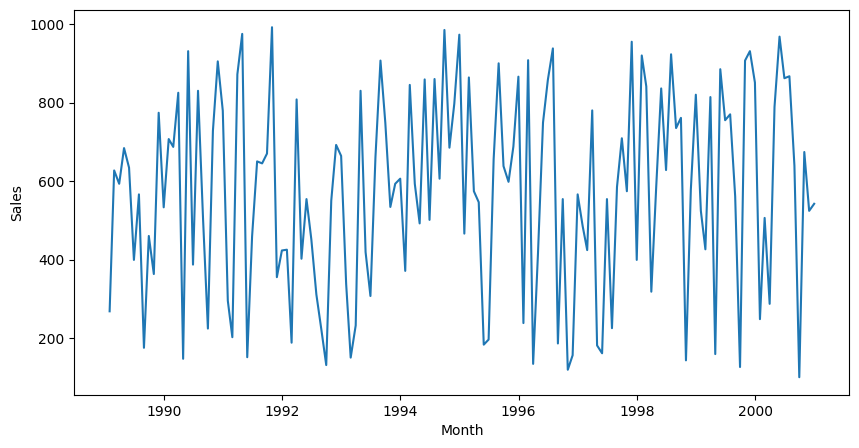

In [ ]:
# Visualise time-series plot.
plt.figure(figsize = (10, 5))
plt.xlabel('Month')
plt.ylabel('Sales')
plt.plot(dummy_in_df)
plt.show()

---

#### Data Transformation to Achieve Stationarity

Generating stationary data is important for enhancing the time series forecasting model. In the previous class, we already determined that our dummy dataset is stationary. Hence, data transformation is not needed in such case.

However, most of the time series data possess trends and seasonality which affect the value of the time series at different times. Thus, we may need to apply various data transformation techniques in order to stationarise the data. Some of the commonly used data transformation techniques to achieve stationarity are as shown in the image below:

<center><img src ="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/31d9095e-426d-484c-bed1-b4bb365e992d.png"/></center>

Apart from these techniques, we can also apply other transformations like taking square, square root, cube, cube root etc. However, these techniques might be needed only when log transformation or differencing is not giving the desired result.





##### **Log Transformation:**

Converting time series data to a logarithmic scale reduces the variability of the data. Let us transform our dummy data to logarithmic scale using `log()` function of the `numpy` module.

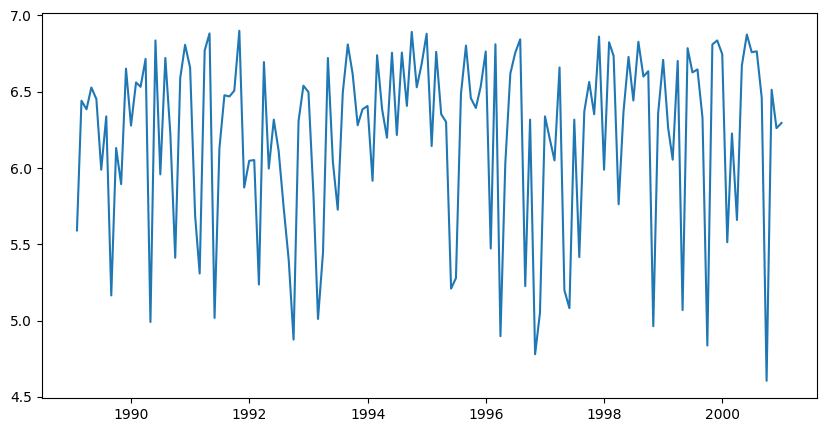

In [ ]:
# Perform log transformation of dataset and plot the transformed data.
plt.figure(figsize = (10, 5))
dummy_log = np.log(dummy_in_df)
plt.plot(dummy_log)
plt.show()

In [ ]:
# Create a custom function to check whether the data is stationary or not.
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

  # Determine rolling statistics
  mov_average = timeseries.rolling(window = 12).mean()
  mov_std = timeseries.rolling(window = 12).std()

  # Plot rolling statistics
  plt.figure(figsize = (10, 5))
  plt.plot(timeseries, color='blue', label = 'Original')
  plt.plot(mov_average, color='red', label = 'Rolling Mean')
  plt.plot(mov_std, color='black', label = 'Rolling Std')
  plt.legend()
  plt.title('Rolling Mean & Standard Deviation')
  plt.show()

  # Perform Dickey–Fuller test
  print('Results of Dickey Fuller Test:')
  dummy_adf = adfuller(timeseries['Sales'])
  print('ADF Statistic:', dummy_adf[0])
  print('p-value: ', dummy_adf[1])
  print('Critical Values:')
  for key, value in dummy_adf[4].items():
	  print(key,":", value)

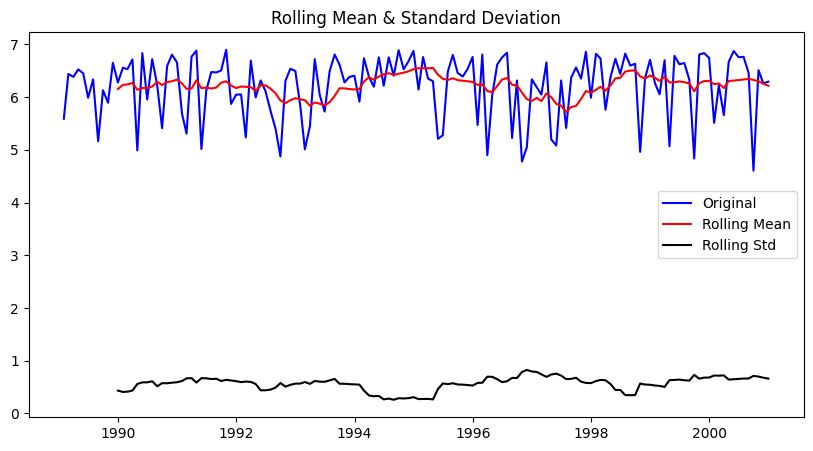

Results of Dickey Fuller Test:
ADF Statistic: -11.666756649335177
p-value:  1.87615339747297e-21
Critical Values:
1% : -3.4769274060112707
5% : -2.8819726324025625
10% : -2.577665408088415


In [ ]:
# Check the stationarity of the log transformed data
test_stationarity(dummy_log)

##### **Differencing:**

Differencing is basically substracting the previous value from the current value of your time series i.e.

$$y'_t = y_t - y_{t-1}$$ such that  $y'_t$ have constant mean and variance and hence can be treated as a stationary series.

Following are the different differencing techniques:           

**1. First-order differencing:**

It is the change between two consecutive observations in the time series and can be written as:

$$y'_t = y_t - y_{t-1}$$

The differenced series will have only $T-1$ values ($T$ is the total number of observations/rows), since it is not possible to calculate the difference $y'_t$ for the first observation. Taking the difference between consecutive observations is also called as **lag-1 difference.**

We can obtain previous time lag i.e. $y_{t-1}$ using the `shift(1)` function of pandas DataFrame. Here, `1` indicates previous time lag. Similarly, to obtain $y_{t-2}$, we can use `shift(2)` function.


Let us calculate the lag-1 difference $y'_t$ for our dummy DataFrame using the above formula.


In [ ]:
# Perform first-order differencing
first_or_diff_df = dummy_in_df - dummy_in_df.shift(1)  # y′t = yt − yt−1
first_or_diff_df

,Sales
Month,
1989-01-31,NaN
1989-02-28,359.0
1989-03-31,-34.0
1989-04-30,91.0
1989-05-31,-50.0
...,...
2000-08-31,-228.0
2000-09-30,-539.0
2000-10-31,574.0


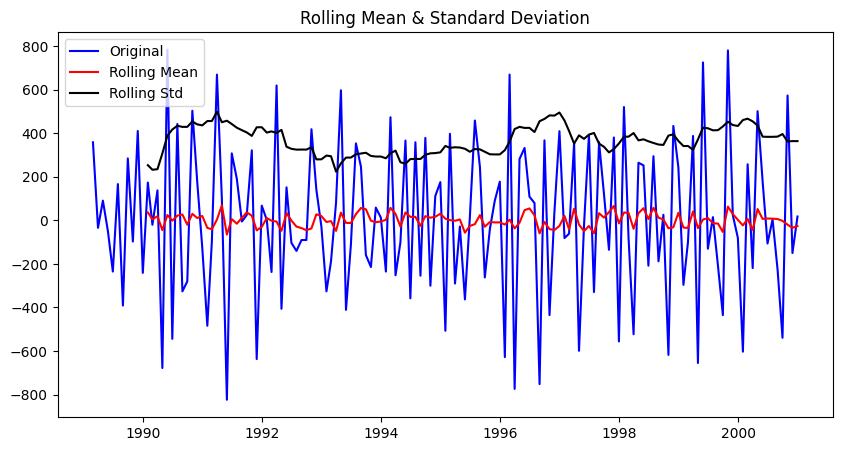

Results of Dickey Fuller Test:
ADF Statistic: -8.186201866299555
p-value:  7.887535475444414e-13
Critical Values:
1% : -3.4793722137854926
5% : -2.8830370378332995
10% : -2.578233635380623


In [ ]:
# Remove NaN values and check stationarity of the time series data
first_or_diff_df.dropna(inplace = True)
test_stationarity(first_or_diff_df)

Hence, you may observe that we obtained a very less p-value and better ADF statistic value as compared to the previous results, thereby confirming that the first-order differenced data is definitely stationary.

However, sometimes first order differenced data may not appear stationary. In such cases, we may need to difference the data a second time to obtain a stationary series.

**2. Second-order differencing:**

It is simply differencing the first order differenced series and is also called as **lag-2 difference**. It can be written as:       

\begin{align}
y''_t &= y'_t - y'_{t-1} \\ &= (y_t - y_{t-1}) - (y_{t-1} - y_{t-2}) \\ &= y_t -2y_{t-1} + y_{t-2}
\end{align}

In this case, $y''_t$ will have only $T-2$ values ($T$ is the total number of observations in the original data).  

Let us calculate the lag-2 difference $y''_t$ for our dummy DataFrame by shifting the lag-1 differenced data.


In [ ]:
# Perform second-order differencing.
sec_or_diff_df = first_or_diff_df - first_or_diff_df.shift(1)    # y''t = y't − y't−1
sec_or_diff_df

,Sales
Month,
1989-02-28,NaN
1989-03-31,-393.0
1989-04-30,125.0
1989-05-31,-141.0
1989-06-30,-185.0
...,...
2000-08-31,-233.0
2000-09-30,-311.0
2000-10-31,1113.0


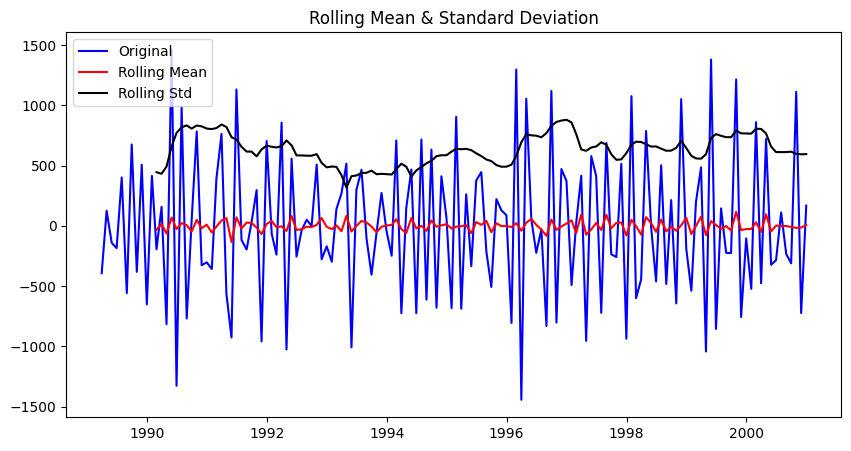

Results of Dickey Fuller Test:
ADF Statistic: -7.137412658516276
p-value:  3.392660170048569e-10
Critical Values:
1% : -3.482087964046026
5% : -2.8842185101614626
10% : -2.578864381347275


In [ ]:
# Remove NaN values and check stationarity of the time series data
sec_or_diff_df.dropna(inplace = True)
test_stationarity(sec_or_diff_df)

Hence, you may observe that we obtained a very less p-value and better ADF statistic value as compared to the previous results, thereby confirming that the second-order differenced data is definitely stationary.

Similarly, you can continue differencing the time series data unless it is stationary. In practice, it is almost never necessary to go beyond second-order differences.

**3. Seasonal differencing:**

A seasonal difference is the difference between an observation and the previous observation from the same season. It can be written as:

$$y'_t = y_t - y_{t-m}$$ Where $m$ is the number of seasons. These are also called **lag-$m$ differences**, as we subtract the observation after a lag of $m$ periods.

Thus, if $m=12$, the differences are taken between original observations that are a year apart from each
other (for example, lag value for Jan 1990 will be obtained by subtracting its value from Jan 1989).

Let us calculate lag-12 difference for our dummy DataFrame by using `shift(12)` function. Also print the first 20 values of the seasonal differenced DataFrame.

In [ ]:
# Perform seasonal differencing.
seasonal_diff_df = dummy_in_df - dummy_in_df.shift(12)    # y''t = y't − y't−m
seasonal_diff_df.head(20)

,Sales
Month,
1989-01-31,NaN
1989-02-28,NaN
1989-03-31,NaN
1989-04-30,NaN
1989-05-31,NaN
1989-06-30,NaN
1989-07-31,NaN
1989-08-31,NaN
1989-09-30,NaN


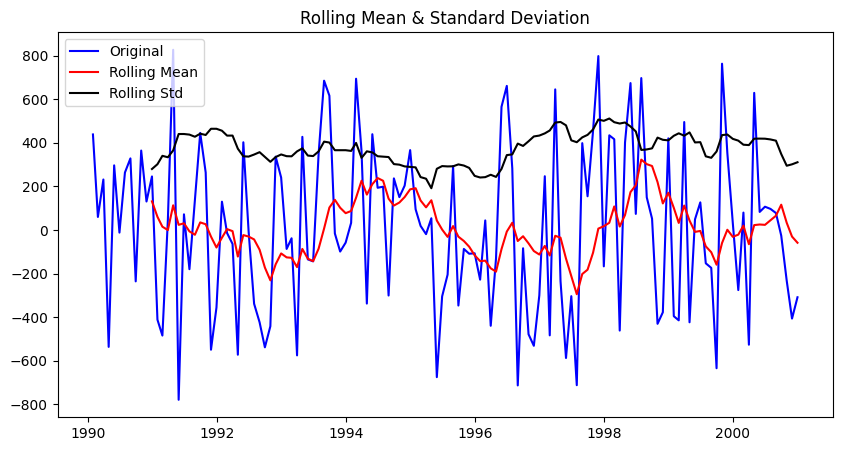

Results of Dickey Fuller Test:
ADF Statistic: -4.977422371115783
p-value:  2.4593498375518446e-05
Critical Values:
1% : -3.486055829282407
5% : -2.8859430324074076
10% : -2.5797850694444446


In [ ]:
# Remove NaN values and check stationarity of the time series data
seasonal_diff_df.dropna(inplace = True)
test_stationarity(seasonal_diff_df)

---

#### Deploying ARIMA Model

ARIMA (Auto Regressive Integrated Moving Average) is a combination of two models **AR (Auto Regressive)** and **MA (Moving Average)**.

It has 3 hyperparameters:
- **p** (auto regressive lags) which comes from AR component. This can be obtained from PACF (partial autocorrelation function) graph.
- **d** (order of differentiation) which is nothing but the order of differencing needed to transform non-stationary data into stationary.
- **q** (moving average) which comes from the MA component. This can be obtained from ACF (autocorrelation function) graph.

<center><img src ="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/76b1e3c5-4644-403b-954c-2edb85ee491a.PNG"/></center>



In [ ]:
# Split the time series data into train and test sets.
train = dummy_in_df.iloc[:len(dummy_in_df) - 12]
test = dummy_in_df.iloc[len(dummy_in_df) - 12 :]
print(train.shape)
print(test.shape)

(132, 1)
(12, 1)


In [ ]:
# Fit an ARIMA model using train set

from statsmodels.tsa.arima.model import ARIMA
model_1 = ARIMA(train, order = (5, 0, 1)) # p= 5, d = 0, q = 1
arima_train = model_1.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


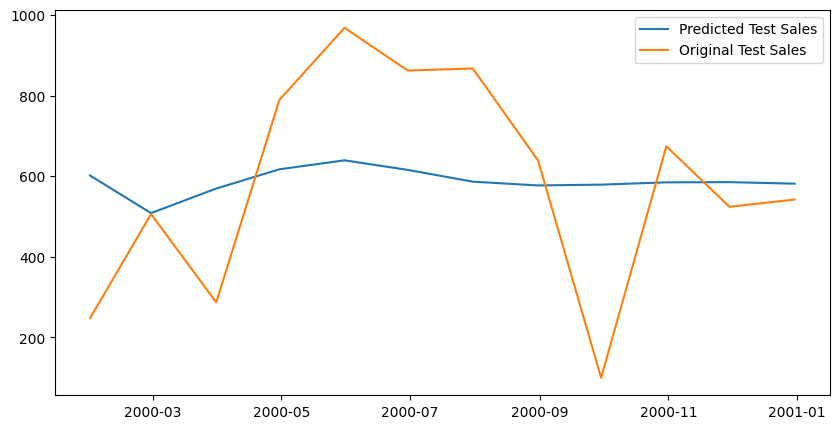

In [ ]:
# Perform prediction using 'predict()' function.
start_index = len(train)
end_index = len(dummy_in_df) - 1

# Predictions against the test set
pred_test = arima_train.predict(start = start_index, end = end_index) # start = 132, end = 143

# Plot predictions and actual values
plt.figure(figsize=(10, 5))
plt.plot(pred_test, label = 'Predicted Test Sales')
plt.plot(test['Sales'], label = 'Original Test Sales')
plt.legend()
plt.show()


In [ ]:
# Perform one-step out-of sample forecast
single_step = arima_train.forecast()#will tell about the future
single_step

2000-01-31    601.588388
Freq: M, dtype: float64

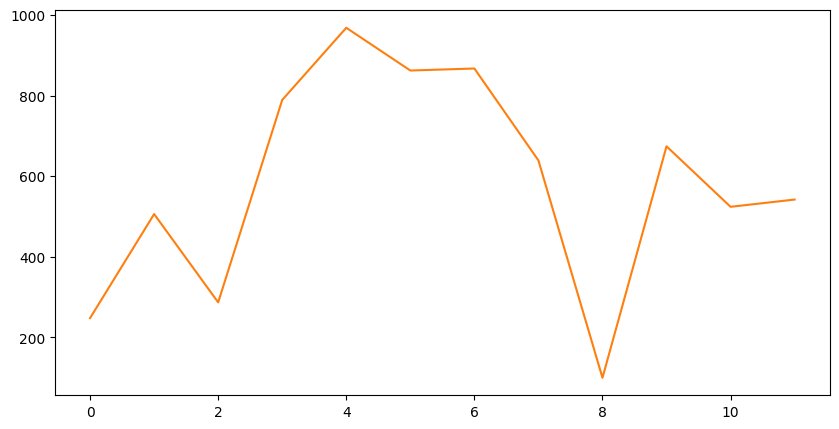

In [ ]:
# Perform forecast for test set using 'forecast()' function
forecast = arima_train.forecast(steps = 12)[0]     # Store only the first element of this tuple.

# Plot forecast and actual values
plt.figure(figsize=(10, 5))
plt.plot(forecast, label = 'Forecasted Test Sales')
plt.plot(test.values, label = 'Original Test Sales' )
plt.show()

In [ ]:
# Evaluate accuracy of the model by calculating MAE and RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE:", mean_absolute_error(test, pred_test))
print("RMSE:", np.sqrt(mean_squared_error(test, pred_test)))

MAE: 199.75396630809976
RMSE: 246.37808793174943


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


MAE: 211.2962011692424
RMSE: 248.82340637831336


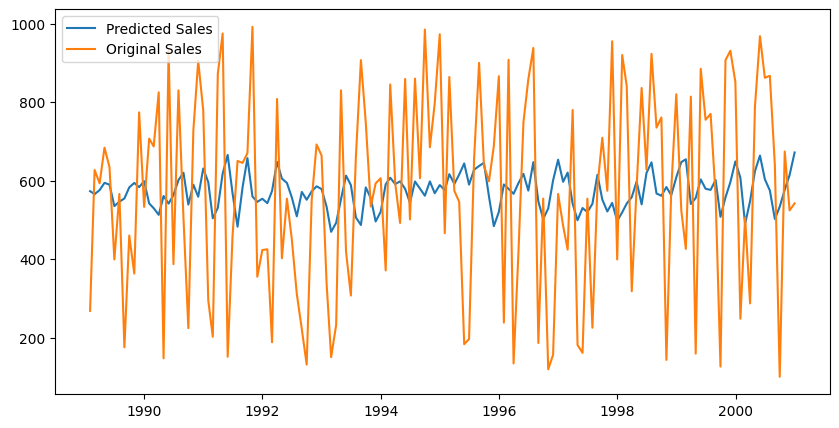

In [ ]:
# Build ARIMA model using entire dataset and plot prediction.

arima_model = ARIMA(dummy_in_df, order = (5, 0, 1)).fit() # p= 5, d = 0, q = 1

# Predict using `predict()` function with start = 0 and end = (total observations - 1)
pred = arima_model.predict(0, len(dummy_in_df) - 1)   # start = 0, end = 143

# Print MAE and RMSE values
print("MAE:", mean_absolute_error(dummy_in_df, pred))
print("RMSE:", np.sqrt(mean_squared_error(dummy_in_df, pred)))

# Plot predictions and actual values
plt.figure(figsize=(10, 5))
plt.plot(pred, label = 'Predicted Sales')
plt.plot(dummy_in_df['Sales'], label = 'Original Sales')
plt.legend()
plt.show()


**ARIMA Future Forecast:**







In [ ]:
# Perform prediction for new values.
plt.figure(figsize=(10, 5))
start_index = len(dummy_in_df)
end_index = start_index + 12
forecast = arima_model.predict(start = start_index, end = end_index)  # start = 144, end = 156
print(forecast)

2001-01-31    648.072417
2001-02-28    549.944491
2001-03-31    576.160189
2001-04-30    563.502918
2001-05-31    562.106566
2001-06-30    577.885776
2001-07-31    573.243503
2001-08-31    574.516186
2001-09-30    572.437659
2001-10-31    570.858076
2001-11-30    572.293268
2001-12-31    572.620963
2002-01-31    573.159283
Freq: M, Name: predicted_mean, dtype: float64


<Figure size 1000x500 with 0 Axes>

Now, let us dive deep into Autoregression models as well as understand some of the terminologies used by these models.

---

#### Activity 1: Data Preparation

Let us first create a dummy dataset consisting of following two columns:              
- `Days`: Days from the `1999-01-01` to `1999-12-31` i.e. total 365 days.
- `Price`: Sorted random integers from `120` to `500`.

Again, use `date_range()` function of `pandas` module to generate dates from `'1999-01-01'` to `'1999-12-31'`.

**Syntax of `date_range()` function:**`pandas.date_range(start = None, end = None, freq = None)`

Where,
- `start`: Left bound for generating dates. Use `YYYY-DD-MM` date format for our dataset.
- `end`: Right bound for generating dates. Use `YYYY-DD-MM` date format for our dataset.
- `freq`: Frequency strings. e.g.  `'D'` (default) for days, `'H'` for hours and `'M'` for months.



In [ ]:
# S1.1: Generate random time series data
np.random.seed(10)  # Use 'seed()' to generate same random integers on every execution of code.

# Generate dates from '1999-01-01' to '1999-12-31' using 'date_range()'
time = pd.date_range(start = '1999-01-01', end = '1999-12-31', freq='D')

# Create random samples with length of dates and sort it
prices = sorted(np.random.randint(120, 500, len(time)))

# Prepare a DataFrame using 'Days' and 'Prices'
price_df = pd.DataFrame({'Days': time, 'Price': prices})
price_df.head()


,Days,Price
0,1999-01-01,120
1,1999-01-02,120
2,1999-01-03,122
3,1999-01-04,123
4,1999-01-05,123


Hence, you may observe that there is price data for each day from 1989 to 2000. Let us further explore this dataset to determine the number of rows and data types of the columns.

In [ ]:
# S1.2: Get the total number of rows and columns and data types of columns.
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Days    365 non-null    datetime64[ns]
 1   Price   365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


There are 365 rows and 2 columns in the dataset. Also, the data type of the `Days` column is `datetime` which is exactly what we need.  
Let us set this column as index of the DataFrame using `set_index()` function. Store this indexed DataFrame as a separate DataFrame.

In [ ]:
# S1.3: Set 'Days' column as index of the DataFrame
price_ind_df = price_df.set_index('Days')
price_ind_df.head()

,Price
Days,
1999-01-01,120
1999-01-02,120
1999-01-03,122
1999-01-04,123
1999-01-05,123


Let us create a line plot to visualise the day-wise indexed DataFrame.

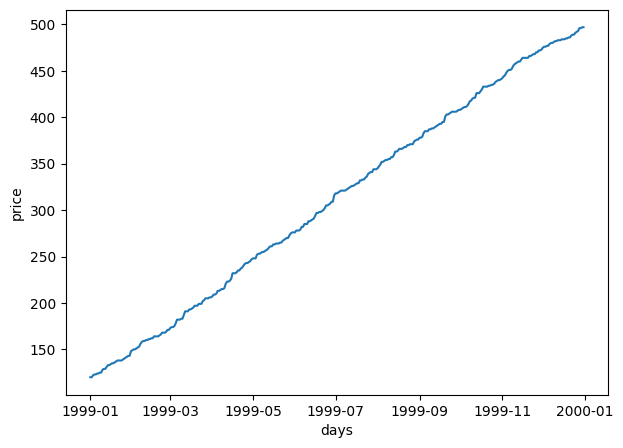

In [ ]:
# S1.4: Visualise time-series plot.
plt.figure(figsize=(7,5))
plt.plot(price_ind_df)
plt.xlabel('days')
plt.ylabel('price')
plt.show()

You may notice that the plot moves in upward direction thereby exhibiting a clear upward trend. Before setting up the forecasting model for this dataset, let us first understand some terms and functions associated with AR time series models.

---

#### Understanding Autoregression

Recall the simple linear regression model equation:

$$y = \beta_0 + \beta_1 x + \epsilon \tag{1.1}$$

Where,
- $x$ is independent variable or feature.

- $y$ is the target variable whose value is to be predicted.

- $\beta_0$ is the intercept or the constant.
- $\beta_1$ is the regression coefficient for feature $x$.

- **$\epsilon$** is the random error or residual obtained along with the predicted value.

If we replace $x$ with $y_{t-1}$ , $y$ with $y_{t}$ and $ \epsilon$ with $ \epsilon_{t}$ in equation 1.1, we get:

$$y_t = \beta_0 + \beta_1 y_{t-1} + \epsilon_t \tag{1.2}$$

Here,
 - $y_t$ is the value of target variable $y$ obtained at current time $t$.
 - $y_{t-1}$ is the value of target variable $y$  at a previous time lag $(t-1)$.
 - **$\epsilon_t$** is the random error or residual obtained for current time $t$.

Let us use $\phi$ instead of $\beta$ to represent coefficients.

Thus, equation 1.2 can be rewritten as:

$$y_t = \phi_0 + \phi_1 y_{t-1} + \epsilon_t \tag{1.3}$$

Thus, the target variable in the previous time period ($y_{t-1}$) has become the predictor. This is nothing but an **Autoregressive (AR)** model.

<img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/2ed779bb-99bf-4856-9770-ff63fd5913f1.png" width = 25 width = 20/> An **AR** model uses a linear combination of past values of the target variable to predict its future value. Autoregression is made of the word, **Auto** and **Regression** which means  linear regression on itself (auto). Thus, it is actually training a regression model on the value of the target variable itself.

**Order of an AR model (`p`):**

The order of an AR model is the number of immediately preceding values in the series that are used to predict the value at present. So, the equation (1.3) model is a first-order autoregression, written as **AR(1)**.

Similarly, if we want to predict $y$ using two previous time lags, for example measuring global temperature in the previous two years ($y_{t-1}$, $y_{t-2}$), then the autoregressive model for doing so would be:

$$y_t = \phi_0 + \phi_1 y_{t-1} + \phi_2 y_{t-2}+ \epsilon_t \tag{1.4}$$

This model is a second-order autoregression, written as **AR(2)**, since the value at time $t$  is predicted from the values at times $t-1$ and $t-2$. This is similar to multiple linear regression model using two feature variables.

More generally, the auto-regressive model is defined as **AR(p)**, where `p` refers to the order of the AR
component:

$$\boxed{y_t = \phi_0 + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \dots + \phi_p y_{t-p} + \epsilon_t } \tag{1.5}$$

---

#### Activity 2: Correlation and Autocorrelation

An autoregression model makes an assumption that the observations at current and previous
time steps are useful to predict the value at the next time step. This relationship between
variables is called **Correlation**.

In one of the previous classes, we already explored the concept of correlation and correlation coefficient. Let us recall these terms.

**Correlation:**

- Correlation measures the strength of a linear relationship between two variables.
- A correlation coefficient is a number between -1 and 1 that describes a negative or positive correlation respectively. A value of zero indicates no correlation.

**Autocorrelation:**
- Similar to correlation, for a time series model, we can determine the strength of linear relationship between the output variable $y_t$ and its values at previous time lags.
- *As the correlation is calculated between the
variable and itself at previous time steps, it is called an <b>Autocorrelation</b>*.
- Thus, lag-1 autocorrelation is the correlation between $y_t$ and $y_{t-1}$.
- Similarly, lag-2 autocorrelation is the correlation between $y_t$ and $y_{t-2}$ and so on.
- Similar to correlation coefficient, the autocorrelation coefficients also lies in the range of (-1, 1) including -1 and 1.

**Why to determine autocorrelation?**

The autocorrelation statistics helps to choose which lag variables will be useful in a model
and which will not. If all lag variables show low or no correlation with the output variable, then it suggests that the time series problem may not be predictable. Thus, determining autocorrelation can be very useful when getting started on a new dataset.

Let us investigate the autocorrelation of the price dummy dataset to determine whether there exists any autocorrelation. If yes, then we will develop
an AR model to make predictions. If not, then we cannot use AR model for prediction.

**1. Checking correlation using `lag_plot()` function:**

A quick check for autocorrelation would be to plot the observation at the current time step ($t$) with the observation at the previous time step   ($t-1$) as a scatter plot.

This could be done manually by first creating a
lag-1 version of the time series dataset and using a built-in scatter plot function in the Pandas
library. But there is an easier way.
Pandas provide a built-in plot to do exactly this, called the `lag plot()` function.

To use this function, import `lag_plot` from `pandas.plotting` module and pass the DataFrame as input to this function.



In [ ]:
# T2.1: Determine lag-1 autocorrelation using 'lag_plot()' function.
from pandas.plotting import lag_plot
lag_plot(price_ind_df)
plt.show()

Running the above code plots the today's price data ($t$) on the $x$-axis against the price on the previous day ($t-1$) on the $y$-axis. We can see a large number of observations along a diagonal line of the plot. It clearly shows a relationship or correlation.

Another way to check for  autocorrelation is to directly calculate the correlation coefficient between the observation and the lag variable using the `corr()` function.

**2. Checking correlation using `corr()` function:**

We had already used `corr()` function to calculate correlation coefficient values between the numeric columns of a DataFrame.

To use this function for time-series dataset, first create a lag-1 version of the dataset and then calculate a correlation matrix between original variable and lag-1 variable. To do so, follow the steps given below:
1. Create an empty DataFrame `corr_df`.
2. Store the `'Price'` column of original indexed DataFrame as `'t'` column in `corr_df` DataFrame.
3. Shift the original DataFrame by 1 to obtain its lag-1 version using `shift(1)` function.
4. Store the lag-1 values as `'t-1'` column in `corr_df` DataFrame.
5. Use `corr()` function with `corr_df` DataFrame to print the correlation coefficient between $y_t$ and $y_{t-1}$.

In [ ]:
# S2.1: Create lag-1 version of dataset
# Make an empty DataFrame
corr_df = pd.DataFrame()

# Create a column named 't' with 'Price' of the indexed price DataFrame
corr_df['t'] = price_ind_df['Price']

# Shift the values of 1 using 'shift()' function
lag1_df = price_ind_df.shift(1)

# Create a column named 't-1' with the shifted values
corr_df['t-1'] = lag1_df
corr_df

,t,t-1
Days,,
1999-01-01,120,NaN
1999-01-02,120,120.0
1999-01-03,122,120.0
1999-01-04,123,122.0
1999-01-05,123,123.0
...,...,...
1999-12-27,493,492.0
1999-12-28,496,493.0
1999-12-29,496,496.0


In [ ]:
# S2.2: Print the lag-1 correlation coefficient
print(corr_df.corr())

           t      t-1
t    1.00000  0.99995
t-1  0.99995  1.00000


It shows a strong positive correlation (0.99)
between the observation and the $\text{lag} = 1$ value. Similarly, we can calculate the correlation between the observation and other lag variables like $\text{lag} = 2$,  $\text{lag} = 3$ and so on. But this would be a tedious task if we want to check a large number of lag variables in our time series.

Let us study the scaled-up version of this approach.

**3. Autocorrelation Function (ACF) plots:**

We can plot the correlation coefficient for each lag variable using `plot_acf()` function. The autocorrelation function (ACF) gives us the values of autocorrelation of any series  with its lagged values.


To plot autocorrelation function, import `plot_acf()` from `statsmodels.graphics.tsaplots` module and pass the indexed DataFrame as input to this function.

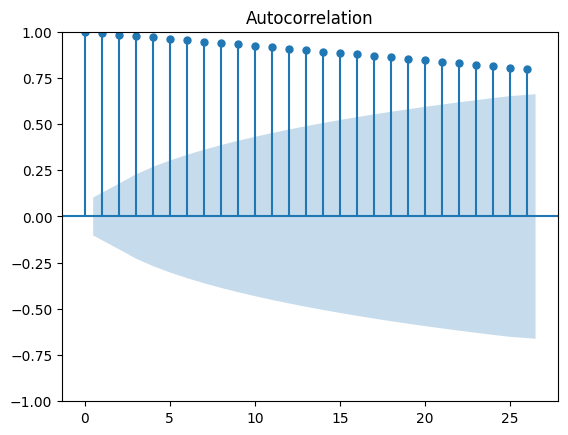

In [ ]:
# S2.3: Plot ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(price_ind_df)
plt.show()

The above plot provides the lag number along the $x$-axis and the correlation coefficient value
between -1 and 1 on the y-axis.

Blue bars on an ACF plot above are the error bands, and anything within these bars is not statistically significant. It means that correlation values outside of this area are very likely a correlation and not a statistical fluke.

For our price dummy dataset, all the lag variables are statistically significant. However, this may not be the case for every AR model.

For example, if your ACF plot looks like this:

<center><img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/951844a8-2c2c-446d-bcc3-7c0712f0e1f8.png"/>

`Fig 2.1: A sample ACF plot of an AR model`
</center>

In this case, only first 4 lag values are statistically significant as they are outside the error bands.


Notice that for a lag 0, ACF is always equal to one, which makes sense because the signal is always perfectly correlated with itself.

To summarise,
- Autocorrelation is the correlation between a variable and its values at previous time steps.
- ACF plots are simply a visual representation of autocorrelation.


Let us understand one more type of function which plays a major role in determining the order of an AR model (`p`).

---

#### Activity 3: Understanding Partial Autocorrelation

So far, we have discussed autocorrelation which is a measure of linear dependency between variables $y_t$ and  $y_{t-p}$. AR models capture this dependency as a linear regression between  $y_t$ and  $y_{t-p}$.

However, it may be possible that the autocorrelation between $y_t$ and $y_{t-p}$ is influenced by intermediate variables like $y_{t-1}, y_{t-2}, y_{t-3} ...$ and so on.  For example, the autocorrelation between $y_t$ and $y_{t-3}$ might be affected by correlations between $y_{t-1}$ and $y_{t-2}$.

Therefore, if we are using AR model, autocorrelation is not the correct measure of the actual correlation between $y_t$ and $y_{t-p}$ in the presence of the
intermediate variables.

**Partial autocorrelation** solves this problem by measuring the correlation between $y_t$ and $y_{t-p}$ when the influence of the intermediate variables has been removed. Thus, the partial autocorrelation at lag `p` is the correlation that results after removing the effect of any correlations due to the intermediate lags.

For example, lag-3 partial autocorrelation i.e partial autocorrelation of $y_t$ and $y_{t-3}$ will consist of correlation with only those parts or components of $y_{t-3}$ that were not explained by $y_{t-1}$ and $y_{t-2}$. Thus, it skips the intermediate correlations among the lags.

**Partial Autocorrelation Function (PACF):**

- PACF is the partial autocorrelation function that explains the partial correlation between the series and lags of itself.
- It is similar to the concept of ACF except that it removes the effect of previous time periods.
- Partial autocorrelation helps in identifying the order `p` of an AR(p) model.

**Why not use ACF plots to determine order `p` of an AR model?**

We cannot use the ACF plot to identify order `p` of a pure AR model as it exhibits good correlations even for the lags which are far in the past as seen in the plot below:
<center>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/1296483b-0a8c-4903-995b-763499694dd6.png"/>

`Fig 3.1: ACF plot of price dummy dataset`
</center>

Here, we can observe that all the lags have good autocorrelation. If we consider these many lags (for example, `p = 25`) for our AR model, then the equation for AR(25) model would look like this:

$$y_t = \phi_0 + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \dots + \phi_{25} y_{t-25} + \epsilon_t$$

Here, $y_{t-1}, y_{t-2}, ..., y_{t-25}$ are like feature variables, similar to multiple linear regression models. These features may have high correlation among each other which result in multicollinearity problem. Let us check whether there exists multicollinearity for first 10 lagged variables by creating lagged version of the dummy dataset.

In [ ]:
# T3.1: Create a dataframe having 10 lagged values of the dataset and print correlation coefficients
corr_lag_df = pd.DataFrame()

# Create a column named 't' with 'Price' of the indexed price DataFrame
corr_lag_df['t'] = price_ind_df['Price']

# Using a for loop, Shift the values using 'shift()' function
# and create a column named 't-1' with the shifted values
for lag in range(1, 11):
  corr_lag_df['t-'+ str(lag)] =  price_ind_df.shift(lag)

# Create a correlation matrix for the lagged DataFrame
print(corr_lag_df.corr())

             t       t-1       t-2       t-3       t-4       t-5       t-6  \
t     1.000000  0.999950  0.999907  0.999875  0.999844  0.999813  0.999778   
t-1   0.999950  1.000000  0.999950  0.999907  0.999874  0.999843  0.999812   
t-2   0.999907  0.999950  1.000000  0.999949  0.999906  0.999874  0.999842   
t-3   0.999875  0.999907  0.999949  1.000000  0.999949  0.999905  0.999873   
t-4   0.999844  0.999874  0.999906  0.999949  1.000000  0.999949  0.999905   
t-5   0.999813  0.999843  0.999874  0.999905  0.999949  1.000000  0.999949   
t-6   0.999778  0.999812  0.999842  0.999873  0.999905  0.999949  1.000000   
t-7   0.999735  0.999777  0.999811  0.999841  0.999872  0.999904  0.999948   
t-8   0.999693  0.999733  0.999776  0.999810  0.999841  0.999871  0.999904   
t-9   0.999655  0.999690  0.999731  0.999774  0.999809  0.999840  0.999870   
t-10  0.999619  0.999652  0.999688  0.999729  0.999773  0.999807  0.999838   

           t-7       t-8       t-9      t-10  
t     0.999735  

You may observe that all the predictors (lag-1, lag-2, .. , lag-10) have extremely high correlation coefficient amongst each other, thereby confirming the presence of multicollinearity. Hence, if we look at ACF plot and decide the order `p` of an AR model, we may end up with multicollinearity issues.



However, this is not a problem with PACF plot of AR model as it removes components already explained by earlier lags, so we only get the lags which have the correlation with the residual i.e the component not explained by earlier lags.


Let us create a PACF plot for price dummy dataset and identify the order of AR model. To do this, import `plot_pacf` function from `statsmodels.graphics.tsaplots` module and pass the indexed DataFrame as input to this function.


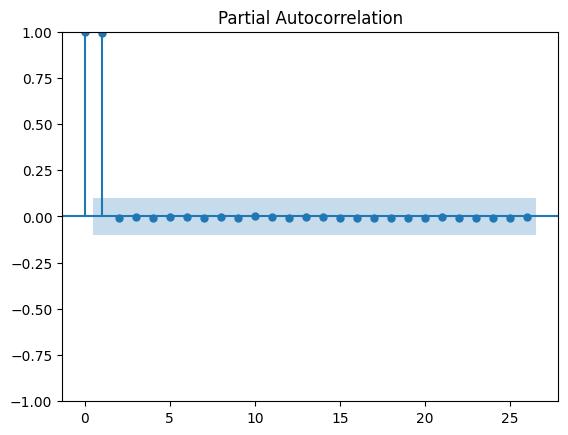

In [ ]:
# T3.2: Plot PACF
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(price_ind_df)
plt.show()

The first partial autocorrelation at lag 0 is always 1. Also note that our PACF plot has a significant spike only at lag 1, meaning that the autocorrelations for all the higher value lags like lag 2, lag 3, .. lag 25  are effectively explained by the lag-1 autocorrelation.

Hence, if we consider order of AR model to be `2` or `20` or any higher value, it would be redundant, as lag-1 is itself enough to interpret the autocorrelations for higher lag values.

Thus, the order of AR model in our case is `p = 1` i.e. we need only lag-1 variable ($y_{t-1}$).  In this way, we can determine the order of AR models using PACF plots. We will understand how to determine the order of MA and ARMA models in more detail using ACF and PACF plots in the next class.

Let us again create a line plot for our time series data.

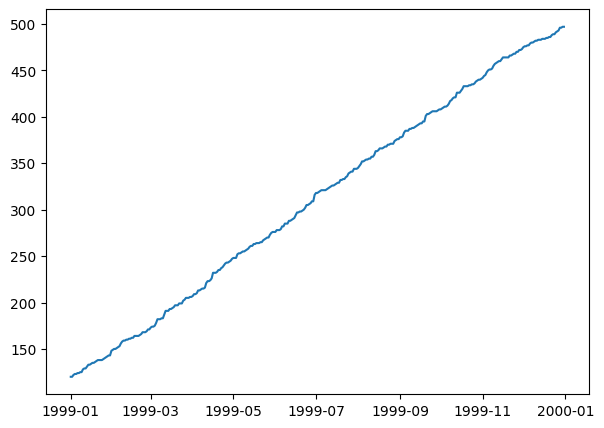

In [ ]:
# S3.1: Visualise time-series plot.
plt.figure(figsize=(7,5))
plt.plot(price_ind_df)
plt.show()

By looking at the plot, we can say that the mean and variance of the above data may or may not be constant.  Let us confirm whether the dataset is stationary or not by implementing ADF test.

In [ ]:
# S3.2: Implement ADF test.


You may observe that the test statistic is negative but the p-value is higher than 0.05. Thus, the null hypothesis that the data is non-stationary cannot be rejected.  Hence, we need to transform this data to make it stationary. We explored two main techniques for stationarising the time series dataset:
- Log Transformation
- Differencing

We will prefer differencing as ARIMA model can implicitly perform differencing in order to make time series stationary by specifying the hyperparameter `d`. This hyperparameter is nothing but the order of differencing.

Let us first manually perform differencing to determine the value of order `d`. We will start with first-order differencing.



In [ ]:
# S3.3: Perform first-order differencing
first_or_diff_df = price_ind_df - price_ind_df.shift(1)  # y′t = yt − yt−1
first_or_diff_df

,Price
Days,
1999-01-01,NaN
1999-01-02,0.0
1999-01-03,2.0
1999-01-04,1.0
1999-01-05,0.0
...,...
1999-12-27,1.0
1999-12-28,3.0
1999-12-29,0.0


You can observe that the value for first observation is `NaN`. Here, the order of differencing is **`1`** as the original DataFrame is differenced only **once**.

Let us now test whether the data obtained after first order differencing is stationary or not by using ADF test. But before that, remove `NaN` values from the differenced DataFrame.

In [ ]:
# S3.4: Remove NaN values and check stationarity of the time series data
first_or_diff_df.dropna(inplace=True)
adf_df=adfuller(first_or_diff_df['Price'])
adf_df

(-15.61130015322321,
 1.7784409866599198e-28,
 1,
 362,
 {'1%': -3.448544133483233,
  '5%': -2.8695574079525565,
  '10%': -2.5710411593052713},
 1074.483768043338)

Hence, you may observe that we obtained a p-value less than 0.05 and a negative ADF statistic value. This rejects the null hypothesis, thereby confirming that the first-order differenced data is definitely stationary and second-order differencing is not needed.

Hence, the order of differencing `d` is 1.

Recall the hyperparameter of ARIMA model:
- **p** (auto regressive lags) which comes from AR component. This can be obtained from PACF plot. Thus, by looking at the PACF plot of price dummy dataset, we concluded that `p = 1`.
- **d** (order of differentiation) which is nothing but the order of differencing needed to transform non-stationary data into stationary. In our case, `d = 1`
- **q** (moving average) which comes from the MA component. This can be obtained from ACF plot. For now, ignore the MA component for our dataset, thus `q = 0`. We will learn the MA component in more detail in the next class.

Thus, ARIMA(1, 1, 0) model is same as AR(1) model with first-order differencing.

Hence, we are now ready to deploy ARIMA(p, d, q) model using `statsmodels` package with `p = 1`, `d = 1` and `q = 0`. Before that, let us split the dataset into train and test such that first 80% observations will be train set and remaining 20% observations will be test set.



In [ ]:
# T3.3: Split the time series data into train and test sets.
train_size = int(len(price_ind_df) * 0.80)
train = price_ind_df[0:train_size]
test = price_ind_df[train_size:len(price_ind_df)]
print(train.shape)
print(test.shape)

Now let us create an ARIMA model for the train set and perform prediction for the test set using the steps given below:

1. Import `ARIMA` class from `statsmodels.tsa.arima_model` module.

2. Create an object of `ARIMA` class and pass the following inputs:
  - `train`:  training set for fitting the model.
  - `order = (1, 1, 0)`: The (`p`, `d`, `q`) order of the model for the autoregressive, differences, and moving average components.

3. Call the `fit()` function using the object of `ARIMA`.


In [ ]:
# S3.5: Fit an ARIMA model using train set
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.arima_model import ARIMA
model_1 = ARIMA(train, order = (1, 1, 0)) # p= 1, d = 1, q = 0
arima_train = model_1.fit()

Let us now perform prediction for the test set using `predict()` function.

**Syntax of `predict()` function:** `ARIMA.predict(start, end)`

Where,
  - `start`: Zero-indexed observation number from which to start forecasting, i.e. the first forecast to start. It can also be a date string or a datetime type.
  - `end`: Zero-indexed observation number at which to end forecasting. It can also be a date string or a datetime type.

Also, plot the predictions and the actual observations and determine the performance of the model.

In [ ]:
# S3.6: Perform prediction using 'predict()' function.
start_index = len(train)
end_index = len(price_ind_df) - 1

# Predictions against the test set
pred_test1 = arima_train.predict(start = start_index, end = end_index)

# Plot predictions and actual values
plt.figure(figsize=(10, 5))
plt.plot(pred_test1, label = 'Predicted Test Price')
plt.plot(test['Price'], label = 'Original Test Price')
plt.legend()
plt.show()



You may observe that the predictions are nowhere closer to the actual observations. This is because the ARIMA(1,1,0) performed prediction for differenced test dataset and not the original test dataset.

If you want to predict values for actual observation rather than differenced observation, pass **`typ = 'levels'`** attribute within the `predict()` function using the following syntax:

`ARIMA.predict(start = start_index, end = end_index, typ = 'levels')`

The `typ` attribute can have following two values:

- `'linear'` : Linear prediction for differenced
 variables.

- `'levels'` : Linear prediction for original
 variables.

Let us again perform prediction for test set for original variables using `typ = levels` attribute and plot the predictions. Also, evaluate this model using accuracy metrics like Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).

In [ ]:
# S3.7: Perform prediction using 'predict()' function for original dataset.

from sklearn.metrics import mean_absolute_error, mean_squared_error
pred_test2 = arima_train.predict(start = start_index, end = end_index, typ = 'levels')

print("MAE:", mean_absolute_error(test, pred_test2))
print("RMSE:", np.sqrt(mean_squared_error(test, pred_test2)))

# Plot predictions and actual values
plt.figure(figsize = (10, 5))
plt.plot(pred_test2, label = 'Predicted Test Price')
plt.plot(test['Price'], label = 'Original Test Price')
plt.legend()
plt.show()

You may observe that the predictions are very close to the actual observations for test set. Also the MAE and RMSE values are very good for the model.

Let us now rebuild the ARIMA(1, 1, 0) model by fitting the model for the entire dataset. Also, plot the predicted values against the actual values and evaluate the model using MAE and RMSE metrics.

**Note:** ⚠
- If you keep start index as `0` for `predict()` function, you will get an error. This is because, the first observation of original dataset was removed by ARIMA(1, 1, 0) model while performing first-order differencing. Hence, the start index for `predict()` function would be `1` and not `0` in this case.

  Similarly, if `d = 2` for ARIMA model, then the start index would be `2` in this case.
  
- Also, the first observation of original dataset must be excluded while determining MAE and RMSE values for the same mentioned reason.

In [ ]:
# S3.8: Build ARIMA model using entire dataset and plot prediction.
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.arima_model import ARIMA
ar_model = ARIMA(price_ind_df, order = (1, 1, 0)).fit() # p= 1, d = 1, q = 0

# Predict using `predict()` function with start = 1 and end = (total observations - 1)
pred = ar_model.predict(1, len(price_ind_df) - 1, typ = 'levels' )   # start = 1, end = 364

# Print MAE and RMSE values
print("MAE:", mean_absolute_error(price_ind_df[1:], pred))
print("RMSE:", np.sqrt(mean_squared_error(price_ind_df[1:], pred)))

# Plot predictions and actual values
plt.figure(figsize=(10, 5))
plt.plot(pred, label = 'Predicted Price')
plt.plot(price_ind_df['Price'], label = 'Original Price')
plt.legend()
plt.show()

You may observe that the predictions are almost same as the actual observations for entire dataset. Also the MAE and RMSE values are very good for this model.

A quick way to plot prediction for the test set or the entire dataset would be to use `plot_predict()` function. It is similar to `predict()` function, except that it directly plots the predicted values. You can specify start and end index to specify the time period for which forecasting is to be done in the `plot_predict()` function also.

If the start and end index are not specified, then it will plot prediction for the entire dataset.

**Syntax of `plot_predict()` function:** `ARIMA.plot_predict(start, end)`

Where,

  - `start`: Zero-indexed observation number from which to start forecasting, i.e. the first forecast to start. It can also be a date string or a datetime type.
  - `end`: Zero-indexed observation number at which to end forecasting. It can also be a date string or a datetime type.


In [ ]:
# S3.9: Plot predictions for entire dataset using 'plot_predict()' function.


Hence, we can conclude that ARIMA(1, 1, 0) model or AR(1) model with first-order differencing performed exceptionally well for this time series data.  

We will stop here. In the next class, we will explore the MA component of ARIMA model and learn how to determine `p` and `q` orders from ACF and PACF plots in more detail.

---

### **Project**

You can now attempt the **Applied Tech Project 129 - ARIMA - III - Autoregression Model** on your own.

**Applied Tech Project 129 - ARIMA - III - Autoregression Model** : https://colab.research.google.com/drive/1dU58ElyveEaB5dIBZgk9Tal_A4hFg9Ma

<br>

---